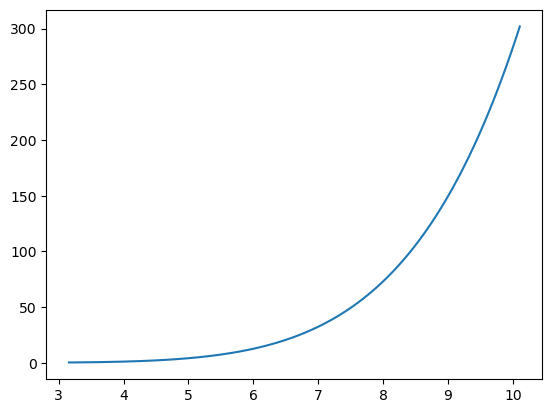

In [1]:
# 1709.08644
import numpy as np
import matplotlib.pyplot as plt

# constants
m_Bc = 6.275
m_J = 3.096
m_tau = 1.777
# m_b+m_c=m_x
m_x = 5.455
# m_b-m_c=m_y
m_y = 2.905
m_e = 0.000511
m_mu = 0.1056584
V_cb = 0.0409
G_F = 1.1663787 * 10**(-5)
# tau_B_0 = 1.519 * 10**(-12)
tau_B_c = 0.464 * 10**(-12)
gamma_total = (6.5821*10**(-25))/tau_B_c
# Central values
Vc_0 = 0.42
Ac_0_0 = 0.59
Ac_1_0 = 0.46
Ac_2_0 = 0.64

q_2_tau = np.linspace(m_tau**(2), (m_Bc - m_J)**2, 1000)
# q_2_mu = np.linspace(m_mu**(2), (m_Bc - m_J)**2, 1000)
# q_square = 9
def DDR(q_square,m_l):
  # Defining Wilson's Coefficient
  C_V1 = 0
  C_V2 = 0
  C_S1 = 0
  C_S2 = 0
  C_T = 0
  # Defining lamda
  lamda = ((m_Bc-m_J)**(2)-q_square)*((m_Bc+m_J)**(2)-q_square)
  Vc =Vc_0 * np.exp(0.065*q_square+0.0015*q_square**(2))
  Ac_0 =Ac_0_0 * np.exp(0.047*q_square+0.0017*q_square**(2))
  Ac_1 =Ac_1_0 * np.exp(0.038*q_square+0.0015*q_square**(2))
  Ac_2 =Ac_2_0 * np.exp(0.064*q_square+0.0041*q_square**(2))
  Tc_1 = (m_x/(m_Bc + m_J))*Vc
  Tc_2 = (m_y/(m_Bc - m_J))*Ac_1
  Tc_3 = -(m_y/q_square)*(m_Bc*(Ac_1-Ac_2)+m_J*(Ac_2+Ac_1-2*Ac_0))


  # Hadronic helicity amplitude
  H_V_1 = (m_Bc + m_J)*Ac_1 - (np.sqrt(lamda)*Vc)/(m_Bc + m_J)
  H_V_2 = (m_Bc + m_J)*Ac_1 + (np.sqrt(lamda)*Vc)/(m_Bc + m_J)
  H_V_0 = ((m_Bc + m_J)/(2*m_J*np.sqrt(q_square)))*(-(m_Bc**(2)- m_J**(2)-q_square)*Ac_1+(lamda*Ac_2)/(m_Bc+m_J)**(2))
  H_Vt = -np.sqrt(lamda/q_square)*Ac_0
  H_S = -(np.sqrt(lamda)/(m_x))*Ac_0
  H_T_1 = (1/np.sqrt(q_square))*((m_Bc**(2)-m_J**(2))*Tc_2+np.sqrt(lamda)*Tc_1)
  H_T_2 = (1/np.sqrt(q_square))*(-(m_Bc**(2)-m_J**(2))*  Tc_2+np.sqrt(lamda)*Tc_1)
  H_T_0 = (1/(2*m_J))*(-(m_Bc**(2)+3*m_J**(2)-q_square)*Tc_2+ (lamda/(m_Bc**(2)-m_J**(2)))*Tc_3)


  # Defining DBR
  # m_l means mass of lepton(e.g m_tau or m_e)

  alpha = ((G_F**(2)*V_cb**(2)*q_square*np.sqrt(lamda))/(192*np.pi**(3)*m_Bc**(3)))*(1-m_l**(2)/q_square)**(2)
  term1 = (abs(1+C_V1)**(2)+abs(C_V2)**(2))*((1+m_l**(2)/(2*q_square))*(H_V_1**(2)+H_V_2**(2)+H_V_0**(2))+(3/(2*q_square))*m_l**(2)*H_Vt**(2))
  term2 = 2*((1+C_V1)*np.conjugate(C_V2)).real*((1+m_l**(2)/(2*q_square))*(H_V_0**(2)+2*H_V_1*H_V_2)+(3/(2*q_square))*m_l**(2)*H_Vt**(2))
  # term2 = (2*((1+C_V1)*np.conjugate(C_V2)).real)*((1+m_l**(2)/(2*q_square))*(H_V_0**(2)+2*H_V_1*H_V_2)+3*m_l**(2)*H_Vt**(2)/(2*q_square))
  term3 = (3/2)*abs(C_S1 - C_S2)**(2)*H_S**(2)+8*abs(C_T)**(2)*(1+2*m_l**(2)/q_square)*(H_T_1**(2)+H_T_2**(2)+H_T_0**(2))
  term4 = 3*(((1+C_V1-C_V2)*(np.conjugate(C_S1)-np.conjugate(C_S2))).real)*(m_l/np.sqrt(q_square))*H_S*H_Vt
  term5= 12*(((1+C_V1)*np.conjugate(C_T)).real)*(m_l/np.sqrt(q_square))*(H_T_0*H_V_0 +H_T_1*H_V_1-H_T_2*H_V_2)
  term6= 12*((C_V2*np.conjugate(C_T)).real)*(m_l/np.sqrt(q_square))*(H_T_0*H_V_0 +H_T_1*H_V_2-H_T_2*H_V_1)
  DDR = alpha*(term1-term2+term3+term4-term5+term6)
  return DDR
plt.plot(q_2_tau,DDR(m_tau,q_2_tau)/gamma_total)


# #  # Integration of gamma w.r.t q^2 for tau mode
# from scipy.integrate import quad

# def integrand(x,m_l):
#     return DDR(x,m_l)
# result_centralvalue_tau, _ = quad(lambda x: integrand(x,m_tau),m_tau**2, (m_Bc - m_J)**2)
# Branch_factor_tau = result_centralvalue_tau/ gamma_total
# print("BF_tau =",Branch_factor_tau)

# result_centralvalue_mu, _ = quad(lambda x: integrand(x,m_mu),m_mu**2, (m_Bc - m_J)**2)
# Branch_factor_mu = result_centralvalue_mu/ gamma_total
# print("BF_mu =",Branch_factor_mu)
# print(gamma_total)


In [40]:
ratio = Branch_factor_tau/Branch_factor_mu
print(ratio)

0.28939200248755476


In [ ]:
# from scipy import integrate

# x = np.arange(m_tau**2, (m_Bc - m_J)**2)
# y = DBR(x,m_tau)
# # using scipy.integrate.simps() method
# gfg = integrate.simps(y, x)
# print(gfg/gamma_total)
# x_ = np.arange(m_mu**2, (m_Bc - m_J)**2)
# y_ = DBR(x_,m_mu)
# gfg_ = integrate.simps(y_, x_)
# print(gfg_/gamma_total)
# ratio_ = gfg/gfg_
# print(ratio)

0.00256102284133018
0.010203855063251836
0.2894846602810191


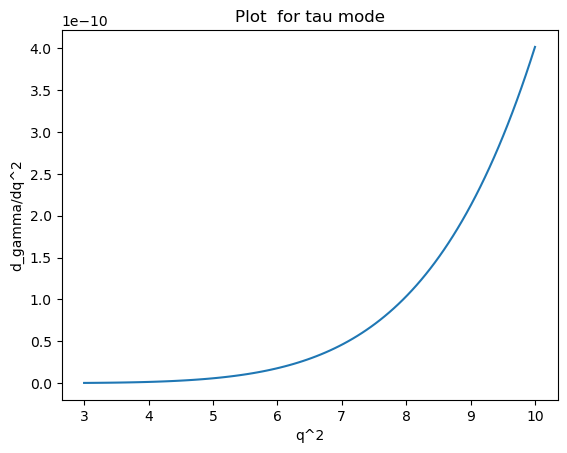

In [2]:
#tau_total = 6.5821*10**(-25)/tau_b_c
#print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
x = np.linspace(3,10,100)
y= DDR(m_tau,x)
# Create the plot
plt.plot(x, y)
plt.xlabel('q^2')
plt.ylabel('d_gamma/dq^2')
plt.title('Plot  for tau mode')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()

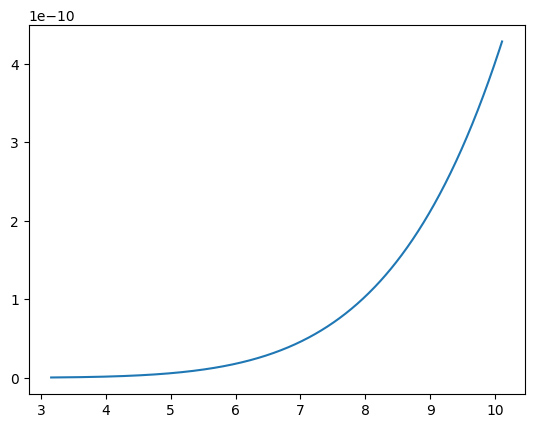

In [33]:
# q_2_tau = np.linspace(m_tau**(2),(m_Bc-m_J)**(2),1000)
plt.plot(q_2_tau,DDR(m_tau,q_2_tau))

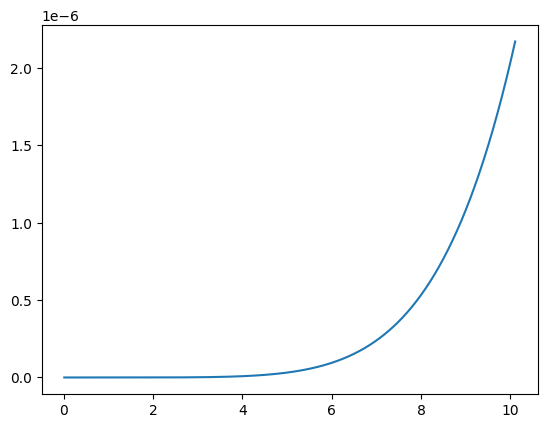

In [35]:
# q_2_mu = np.linspace(m_mu**(2),(m_Bc-m_J)**(2),1000)
plt.plot(q_2_mu,DDR(m_mu,q_2_mu))